In [103]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm


In [104]:
import gymnasium as gym
env = gym.make("MountainCar-v0")#, render_mode="human")
done=False
observation, info = env.reset()
print(env.action_space.n)

3


10 8 3


In [101]:


def episode(i):
    epsilon = 1/(i+1) #epsilon decay
    total_reward=0

    state=env.reset()[0]
    # print((state[0]/n)//1+12)
    done = False
    
    while not done:
        # action chosen according to epsilon-greedy policy
        # print(f"state is {state}")
        
        
        # discretised_position = int(round(state[0]/n,2))
        # shift_pos=int(round(1.2/n,2))
        # pos_row=discretised_position + shift_pos

        #discretising states
        pos_row=int((state[0]+1.2)/n)
        vel_row=int((state[1]+0.07)/nv)


        # discretised_velocity = int(round(state[1]/nv,2))
        # shift_vel=int(round(0.07/nv))
        # vel_row=discretised_velocity + shift_vel
        # # print(f"pos and vel rows are {pos_row,vel_row}")
        
        if np.random.uniform(0,1)<epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_values[pos_row,vel_row])        
        
        new_state,reward,terminated,truncated,info = env.step(action)
        # print(f"{new_state}")
        done = truncated or terminated                                      #becomes true when episode terminates or gets truncated
        total_reward+=reward

        # discretised_newposition = int(round(new_state[0]/n,2))
        # new_pos_row=discretised_newposition+shift_pos

        # discretised_newvelocity = int(round(new_state[1]/nv,2))
        # new_vel_row=discretised_newvelocity + shift_vel
        
        # discretising new states
        new_pos_row=int((new_state[0]+1.2)/n)
        new_vel_row=int((new_state[1]+0.07)/nv)
        
        #update the q_values according to the Q-policy
        q_values[pos_row,vel_row,action]+= learning_rate*(reward + discount_factor*np.max(q_values[new_pos_row,new_vel_row])-q_values[pos_row,vel_row,action])

        state=new_state
        
    return total_reward 

(10, 8, 3)


In [102]:
def train(df_pos,df_vel,alpha,gamma,num_episodes):
    learning_rate = alpha
    discount_factor = gamma
    
    n = df_pos  # discretization factor for position
    nv = df_vel  # discretization factor for velocity

    pos_rows = int((1.2 + 0.6) / n) + 1  # num of rows for position
    vel_rows = int((0.07 + 0.07) / nv) + 1  # num of rows for velocity
    cols = env.action_space.n
    q_values=np.zeros((pos_rows, vel_rows ,cols))
    reward=np.zeros(num_episodes)
    
    for i in range(num_episodes):
        reward[i]=episode(i)
        print(f"reward at {i}th episode is {reward[i]}")


reward at 0th episode is -200.0
reward at 1th episode is -200.0
reward at 2th episode is -200.0
reward at 3th episode is -200.0
reward at 4th episode is -200.0
reward at 5th episode is -200.0
reward at 6th episode is -200.0
reward at 7th episode is -200.0
reward at 8th episode is -200.0
reward at 9th episode is -200.0
reward at 10th episode is -200.0
reward at 11th episode is -200.0
reward at 12th episode is -200.0
reward at 13th episode is -200.0
reward at 14th episode is -200.0
reward at 15th episode is -200.0
reward at 16th episode is -200.0
reward at 17th episode is -200.0
reward at 18th episode is -200.0
reward at 19th episode is -200.0
reward at 20th episode is -200.0
reward at 21th episode is -200.0
reward at 22th episode is -200.0
reward at 23th episode is -200.0
reward at 24th episode is -200.0
reward at 25th episode is -200.0
reward at 26th episode is -200.0
reward at 27th episode is -200.0
reward at 28th episode is -200.0
reward at 29th episode is -200.0
reward at 30th episo

KeyboardInterrupt: 

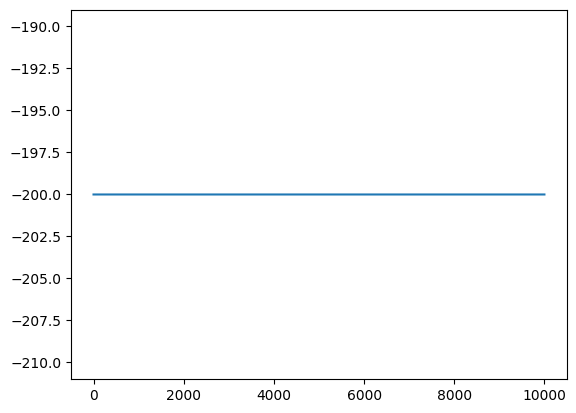

In [29]:
episodes_list = [i for i in range(n_episodes)]

plt.plot(episodes_list,reward)